# Curves as linear models

Sections:

1. Modeling non-linear tearms
2. Curse of complexity

This lecture draws from Chapter 3 of James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

---
# 1. Modeling non-linear terms

Shifting gears back to the main topic of the lecture, let take a look at the case of modeling curves.

First, remember the assumptions of linear regression:

1. $Y$ is *normally distributed*.
2. $f(X)$ describes a *linear* relationship between $X$ & $Y$.
3. There is *no collinearity* in the different variables of $X$.
4. $f(X)$ is *stationary*, such that the observation of one data pair, $<x_n, y_n>$ does not affect the relationship of another data pair, $<x_{n+1}, y_{n+1}>$.

The assumption that $f(X)$ is a linear system is often misunderstood as implying that it restricts to the case where it represents a _straight_ line. But that is not the case. All it means it that it follows the basic rules of algebraic systems such as [associativity](https://en.wikipedia.org/wiki/Associative_property), [commutivity](https://en.wikipedia.org/wiki/Commutative_property), [distributivity](https://en.wikipedia.org/wiki/Distributive_property), etc.

More specificially, this means that the OLS solution works for all sorts of lines, not just straight lines. In fact, the MLE solution to OLS regression works for curves as well as it does with straight lines. This is known as [_polynomial regression_](https://en.wikipedia.org/wiki/Polynomial_regression). 

Polynomial regression is the case where the _steps_ of $X$ are not uniform but follow polynomial properties. For example,

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$$

In this case, $\beta_2$ is called the polynomial effect. Here's how that looks.

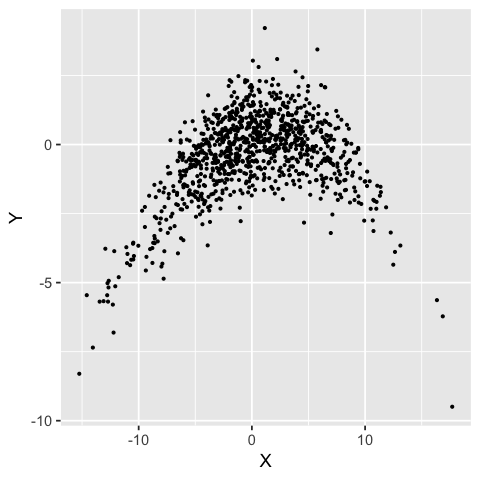

In [3]:
# Restrict plotting dimensions
options(repr.plot.width=4, repr.plot.height=4)
library(ggplot2)

# First define the system
n = 1000
X = rnorm(n, mean = 0, sd = 5)
beta0 = 0.3
beta1 = 0.1
beta2 = -0.03

# Now let's model and plot Y (with noise)
Y = beta0 + beta1*X + beta2*X^2 + rnorm(n) 
df = data.frame(X,Y)
colnames(df)=c('X','Y')
ggplot(df, aes(x=X,y=Y)) + geom_point(size=0.5)

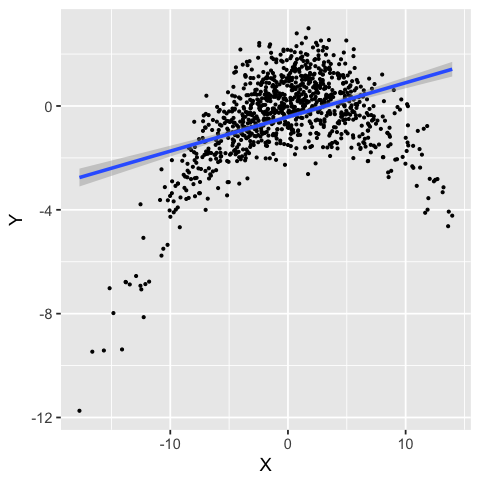

In [3]:
# Now first let's plot the straight line solution
ggplot(df, aes(x=X,y=Y)) + geom_point(size=0.5)+geom_smooth(method="lm")

Obviously modeling this as a simple straight line isn't going to work. But let's see what the simple linear model fits gets you.

In [4]:
summary(lm(Y~X))


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9845 -0.7236  0.1643  0.9839  3.1863 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.422307   0.048034  -8.792   <2e-16 ***
X            0.131749   0.009609  13.711   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.518 on 998 degrees of freedom
Multiple R-squared:  0.1585,	Adjusted R-squared:  0.1577 
F-statistic:   188 on 1 and 998 DF,  p-value: < 2.2e-16


The regression coefficient modeled here is statistically significant (i.e., p<0.05), but the $r^2$ only accounts for a very small portion of the variance, in this case you can only explain 8.8% of the variance.

Now let's look at modeling the second order effect.

`geom_smooth()` using method = 'gam'


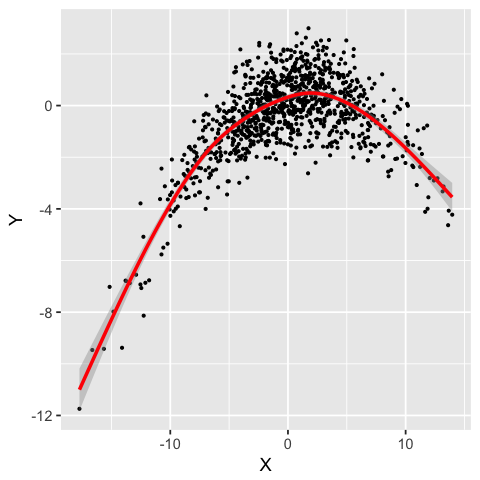

In [5]:
# Now let's plot the curved line
ggplot(df, aes(x=X,y=Y)) + geom_point(size=0.5)+geom_smooth(color="red")

In [26]:
summary(lm(Y~X+I(X^2)))


Call:
lm(formula = Y ~ X + I(X^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1730 -0.6380 -0.0321  0.6622  3.1571 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3182738  0.0378425    8.41   <2e-16 ***
X            0.0991554  0.0062547   15.85   <2e-16 ***
I(X^2)      -0.0302507  0.0008545  -35.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9881 on 997 degrees of freedom
Multiple R-squared:  0.5962,	Adjusted R-squared:  0.5954 
F-statistic: 735.9 on 2 and 997 DF,  p-value: < 2.2e-16


Notice the use of the operator I(X^2) here. This is known as an _inhibit interpretation_ function, which allows r to interpret what's inside the parenteses "as is" (e.g., evaluate it separately from how it would normally be treated within the _lm_ function).

If we look at the $r^2$ of the model, we see that adding in the $X^2$ term substantially improved the model fit (explaining now 60% of the variance in $Y$).

This shows how the OLS solution that we learned for fitting a straight line can be extended to the case of curves as well.

---
In the example above we looked at what is known as a 2nd degree polynomial model. But there is no reason that we can stop at 2nd order polynomials.

More formally an $k^{th}$ degree polynomial defined as

$$ Y = \beta_0 + \beta_1X + \beta_2X^2 + ... + \beta_kX^k + \epsilon $$

Adding higher order polynomials can be very use for modeling more complex $X,Y$ relationships. For example,

`geom_smooth()` using method = 'gam'


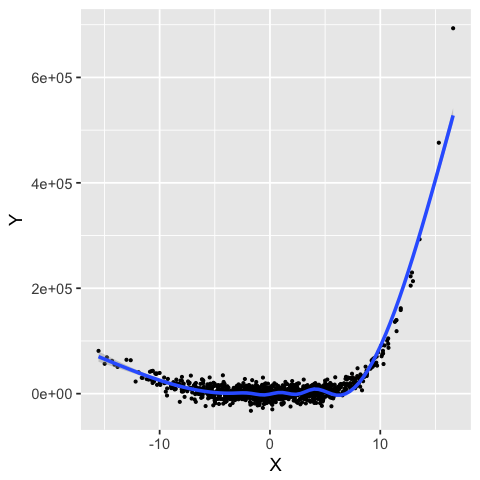

In [6]:
# Let's model a 5th order polynomial relationship
n = 1000
X = rnorm(n, mean = 0, sd = 5)
beta0 = 0.003
beta1 = 0.1
beta2 = -10.3
beta3 = -0.1
beta4 = 5
beta5 = 0.25

# Now show Y
Y = beta0 + beta1*X + beta2*X^2 + beta3*X^3 + beta4*X^4 + beta5*X^5 + rnorm(n, sd = 10000) 
df = data.frame(X,Y)
colnames(df)=c('X','Y')
ggplot(df, aes(x=X,y=Y)) + geom_point(size=0.5) + geom_smooth()


In [9]:
# Compare fitting with a 3rd degree polynomial
summary(lm(Y~poly(X,3)))

# to a 5th degree polynomial
summary(lm(Y~poly(X,5)))


Call:
lm(formula = Y ~ poly(X, 3))

Residuals:
   Min     1Q Median     3Q    Max 
-50797  -9944    418   9591 285279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9621.4      575.3   16.72   <2e-16 ***
poly(X, 3)1 337909.0    18193.3   18.57   <2e-16 ***
poly(X, 3)2 799127.9    18193.3   43.92   <2e-16 ***
poly(X, 3)3 520508.7    18193.3   28.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18190 on 996 degrees of freedom
Multiple R-squared:  0.7564,	Adjusted R-squared:  0.7557 
F-statistic:  1031 on 3 and 996 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ poly(X, 5))

Residuals:
   Min     1Q Median     3Q    Max 
-32852  -6449     74   6841  33454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9621        316   30.45   <2e-16 ***
poly(X, 5)1   337909       9993   33.81   <2e-16 ***
poly(X, 5)2   799128       9993   79.97   <2e-16 ***
poly(X, 5)3   520509       9993   52.09   <2e-16 ***
poly(X, 5)4   444096       9993   44.44   <2e-16 ***
poly(X, 5)5   182193       9993   18.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9993 on 994 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.9263 
F-statistic:  2512 on 5 and 994 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ poly(X, 10))

Residuals:
   Min     1Q Median     3Q    Max 
-32195  -6328    151   6809  33136 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9621.4      316.0  30.446   <2e-16 ***
poly(X, 10)1  337909.0     9993.4  33.813   <2e-16 ***
poly(X, 10)2  799127.9     9993.4  79.966   <2e-16 ***
poly(X, 10)3  520508.7     9993.4  52.085   <2e-16 ***
poly(X, 10)4  444095.8     9993.4  44.439   <2e-16 ***
poly(X, 10)5  182193.1     9993.4  18.231   <2e-16 ***
poly(X, 10)6    7957.3     9993.4   0.796    0.426    
poly(X, 10)7  -16036.7     9993.4  -1.605    0.109    
poly(X, 10)8     744.3     9993.4   0.074    0.941    
poly(X, 10)9   10277.0     9993.4   1.028    0.304    
poly(X, 10)10   7884.2     9993.4   0.789    0.430    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9993 on 989 degrees of freedom
Multiple R-squared:  0.927,	Adjusted R-squared:  0.9263 
F-statistic:  1256 on 1

Notice that there is a lot of nuance in the structure of the $X,Y$ relationship, but that doesn't matter from a modeling perspective becuase you can still thread a line through the joint distribution of $X$ and $Y$. In fact, the more complex that $f(X)$ appears to be, the more higher order terms you can throw into the model. For example, fitting the data with a 3rd degree polynomial can explain a lot of variance, but not as much as a 5th degree polynomial.

<br>
However, this improvement of fits comes at a price...

---
# 2. Curse of complexity

Before we think of polynomial regression as being a panacea that can solve our most complex data analysis problems, let's consider one problem with increasing model complexity. 

Take two completely independent variables and see what happens as we increase model complexity.

In [128]:
# Two random vectors
n = 1000
X = rnorm(n)
Y = rnorm(n)

# The poly function poly(X,n) just sets up the nth order function
# For example, let's setup a 3rd order polynomial of X.
poly(X,3)

1,2,3
-0.0549296802,0.0455199253,-5.907876e-03
0.0388734317,0.0095746670,-2.757788e-02
-0.0028993108,-0.0212656985,6.753927e-03
0.0136739687,-0.0180317946,-1.340786e-02
0.0323715139,-0.0001686776,-2.751431e-02
0.0386135584,0.0091502737,-2.763921e-02
-0.0187828167,-0.0132530740,2.244484e-02
-0.0271064881,-0.0047110278,2.601216e-02
-0.0476533384,0.0291609654,1.065741e-02
-0.0467247384,0.0272374761,1.229381e-02



Call:
lm(formula = Y ~ poly(X, 20))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2332 -0.6647  0.0047  0.6807  3.0489 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -0.061022   0.031749  -1.922   0.0549 .
poly(X, 20)1  -0.392728   1.003989  -0.391   0.6958  
poly(X, 20)2   0.474956   1.003989   0.473   0.6363  
poly(X, 20)3   0.395559   1.003989   0.394   0.6937  
poly(X, 20)4  -0.058770   1.003989  -0.059   0.9533  
poly(X, 20)5   0.656896   1.003989   0.654   0.5131  
poly(X, 20)6   0.084896   1.003989   0.085   0.9326  
poly(X, 20)7   0.003075   1.003989   0.003   0.9976  
poly(X, 20)8  -0.319136   1.003989  -0.318   0.7507  
poly(X, 20)9   0.281431   1.003989   0.280   0.7793  
poly(X, 20)10  0.784256   1.003989   0.781   0.4349  
poly(X, 20)11 -1.156575   1.003989  -1.152   0.2496  
poly(X, 20)12 -0.135478   1.003989  -0.135   0.8927  
poly(X, 20)13  0.457734   1.003989   0.456   0.6486  
poly(X, 20)14  2.297202   1.003989   2.288  

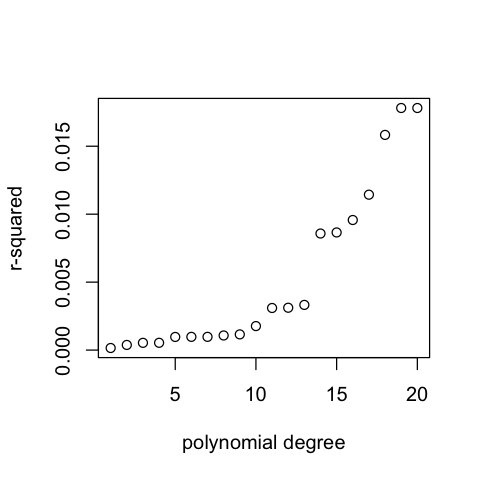

In [133]:
# Now let's increase the complexity of a model between X & Y and see how the fits change
rsqr=list()
for (i in 1:20){
    s = summary(lm(Y~poly(X,i)))
    rsqr[i] = s$r.squared
}

plot(1:20,rsqr, xlab="polynomial degree", ylab="r-squared")

summary(lm(Y~poly(X,20)))

Notice here that the $r^2$ value is increasing as we increase the complexity (i.e., degree of the polynomial). We even see some indepenendent regressors become statistically significant predictors. These are true _even though these are completely unrelated variables_!

<br>
This brings us to an issue we will keep returning to in this class.

* **Overfitting**: As the complexity of a model (i.e., p) increases, the model becomes more variable and begins to account for unique noise rather than stable patterns.

When evaluating a model fit, you always want to take into account its complexity. A model with 10 predictor variables will _always_ have better goodness of fit than a model with 2 predictor variables. This is overfitting.

There are many ways to account for model complexity when evaluating a particular model fit. All share a common form: _penalize models with more variables_. For example, one of the most popular adjusted model evaluation criteria is the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion). In our nomenclature, AIC is calculated as

$$ AIC = 2p - 2log(L) $$

Where $log(L)$ is the log-likelihood of the data given a model with $p$ predictors. In the case of linear regression, this reduces to

$$ AIC = 2p - 2log(\frac{RSS}{n}) $$

Notice here that as p increases, AIC for the same RSS gets bigger. Thus, smaller values of AIC (and all measures of _information criteria_) reflect better model fits. That is because information criteria measure the amount of information _left unexplained_ by the model. So when comparing two models with different complexities, you want to select the model with the lowest AIC (since complexity is accounted for in the calculation).

We will return to AIC and the issue of overfitting later in the course.